## Build the Network

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=ca4ecf53f1e45cd2910e2e80be7244f2865a743f8498001840e159ac4bd10e94
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [3]:
nx.__version__

'3.3'

In [4]:
#https://en.wikipedia.org/wiki/Vintage_computer
SEED = "Vintage computer".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

In [5]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0 - A SEED está na camada 0
todo_set = set(SEED) # The SEED itself - A SEED em si
done_set = set() # Nothing is done yet - Nada foi feito ainda

In [6]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [7]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Vintage Computer
1 Acorn Archimedes
1 Acorn Computers
1 Advanced Risc Machines
Could not load Advanced Risc Machines
1 Altair 8800
1 Amiga


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Amiga
1 Amiga 500
Could not load Amiga 500
1 Amstrad
Could not load Amstrad
1 Apple I
Could not load Apple I
1 Apple Ii
Could not load Apple Ii
1 Apple Ii Peripheral Cards
1 Apple Inc.
Could not load Apple Inc.
1 Argentina
1 Bbc Micro
1 Brazil
1 Bulletin Board
1 Cosmac Elf
1 Chile
1 Commodore 128
1 Commodore 64
Could not load Commodore 64
1 Commodore International
1 Commodore Pet
1 Ebay
1 Emulator
1 Ethernet
1 Finder (Software)
1 Gr8Bit
Could not load Gr8Bit
1 Graphical User Interface
1 Hacker (Hobbyist)
1 Hertz
Could not load Hertz
1 History Of Computing Hardware
1 History Of Computing Hardware (1960S–Present)
1 Homebrew (Video Games)
1 Ibm 1130
Could not load Ibm 1130
1 Ibm 5100
1 Ibm 5150
Could not load Ibm 5150
1 Ibm 5155
1 Ibm 5160
1 Ibm 5170
Could not load Ibm 5170
1 Ibm Pc
Could not load Ibm Pc
1 Imsai
1 Issn (Identifier)
1 Internet
1 Kc 85
Could not load Kc 85
1 Keyboard Technology
1 Living Computers: Museum + Labs
1 Mos Technology 6502
1 Msx
Could not load Msx
1

In [8]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16161 nodes, 22188 edges


## Eliminate Duplicates

In [9]:
# make a copy of raw graph
original = g.copy()

In [10]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Emulator', 'Emulators'), ('Expansion Slot', 'Expansion Slots'), ('Microcomputer', 'Microcomputers'), ('Home Computer', 'Home Computers'), ('Integrated Circuit', 'Integrated Circuits'), ('Emac', 'Emacs'), ('Iphone 3G', 'Iphone 3Gs'), ('Iphone X', 'Iphone Xs'), ('Peripheral', 'Peripherals'), ('Cardiovascular Disease', 'Cardiovascular Diseases'), ('China', 'Chinas'), ('Christian', 'Christians'), ('Mammal', 'Mammals'), ('Pampa', 'Pampas'), ('Syrian', 'Syrians'), ('Waterway', 'Waterways'), ('Computer Keyboard', 'Computer Keyboards'), ('Function Key', 'Function Keys'), ('Afro-Brazilian', 'Afro-Brazilians'), ('Birth Rate', 'Birth Rates'), ('Economic', 'Economics'), ('Soybean', 'Soybeans'), ('Himalaya', 'Himalayas'), ('Indo-European Language', 'Indo-European Languages'), ('Game Console', 'Game Consoles'), ('Typewriter', 'Typewriters'), ('Semigraphic', 'Semigraphics'), ('Computer', 'Computers'), ('Video Game', 'Video Games'), ('Http', 'Https'), ('Virtual Keyboard', 'Virtual Keyboards'), ('El

In [11]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16079 nodes, 22139 edges


## Truncate the network

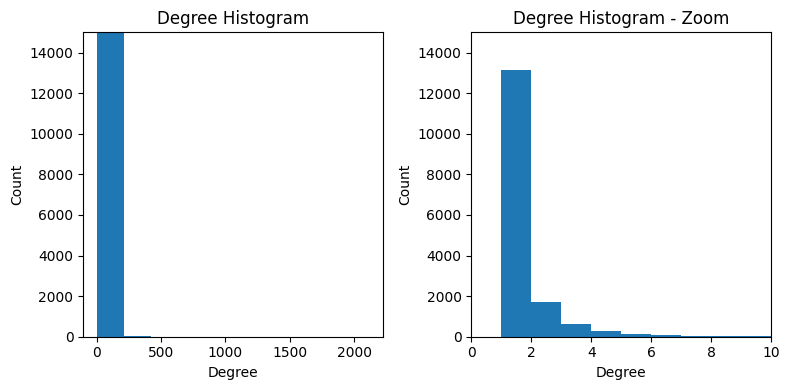

In [12]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [13]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "seed03.graphml")

2937 nodes, 8997 edges


In [14]:
print("Nodes removed: {:.2f}%".format(100*(1 - 2937/16079)))
print("Edges removed: {:.2f}%".format(100*(1 - 8997/22139)))
print("Edges per nodes: {:.2f}".format(16079/2937))

Nodes removed: 81.73%
Edges removed: 59.36%
Edges per nodes: 5.47


## Explore the network

In [15]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

32 Issn (Identifier)
30 Central Processing Unit
28 Operating System
27 Wayback Machine
27 S2Cid (Identifier)
25 Personal Computer
22 Microprocessor
21 Read-Only Memory
19 Floppy Disk
19 Ibm
19 Home Computer
19 Microcomputer
18 Random-Access Memory
16 Cp/M
16 Commodore 64
16 Printed Circuit Board
16 Amiga
16 Apple Inc.
16 Kilobyte
15 The New York Times
15 United States
15 Microsoft
15 Oclc (Identifier)
15 Texas Instruments
15 Zilog Z80
14 Ibm Pc Compatible
14 Apple Ii
14 Commodore International
14 Byte (Magazine)
14 Basic
13 Integrated Circuit
13 Altair 8800
12 Software
12 Commodore Pet
12 Computer Hardware
12 Computer Terminal
12 Mainframe Computer
12 Computer Keyboard
12 Trs-80
11 Apple I
11 Ibm Personal Computer
11 Atari St
11 Emulator
11 Mos Technology 6502
11 Motorola 68000
11 Minicomputer
10 Intel
10 Dynamic Random-Access Memory
10 Zx Spectrum
10 Intel 8080
10 Ms-Dos
10 United Kingdom
10 Computer
10 Apple Lisa
10 Assembly Language
10 Computer Mouse
10 Popular Electronics
9 Infowor